**not a knot approach to solve the cublic spline interpolation**

In [28]:
using Plots
using LinearAlgebra

In [29]:
# data_points = [(-1, 0.038), (-0.8, 0.058), (-0.60, 0.10), (-0.4, 0.20),(-0.2,0.3)]
data_points = [(3.0,2.5),(4.5,1.0),(7.0,2.5),(9.0,0.5),(10.0,2.0)]
k = length(data_points)

5

In [30]:
x_points = [data_points[i][1] for i in 1:k]
y_points = [data_points[i][2] for i in 1:k]

5-element Vector{Float64}:
 2.5
 1.0
 2.5
 0.5
 2.0

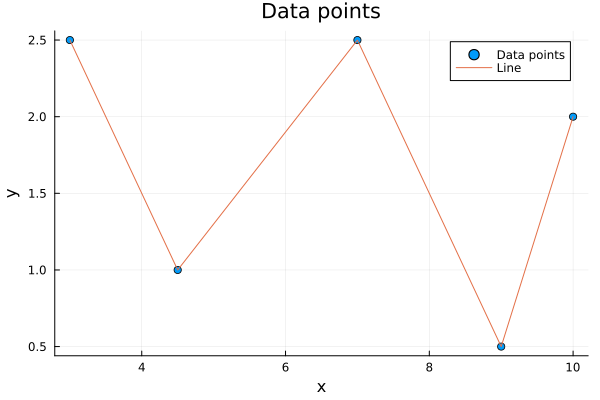

In [31]:
# plot the data points and the line
scatter(x_points, y_points, label="Data points", xlabel="x", ylabel="y", title="Data points")
plot!(x_points, y_points, label="Line")

In [32]:
# number of required cubic polynomials equations
number_of_equations_required(k) = k-3
# number of unknowns variables
number_of_unknows_variable(k) = 4*k # k is the number of cubic polynomials equations

number_of_unknows_variable (generic function with 1 method)

In [33]:
# number of cubic polynomials equations
number_of_equations = number_of_equations_required(k)
# number of unknowns variables
number_of_unknows = number_of_unknows_variable(number_of_equations)


8

In [34]:
# A matrix
A = zeros(number_of_unknows, number_of_unknows)
# b vector
b = zeros(number_of_unknows)

8-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [35]:
number_of_equations

2

In [36]:
# generate intervals for each cubic polynomial
# x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
# intervals (x1,x3),(x3,x4),(x4,x5),(x5,x6),(x6,x7),(x7,x8),(x8,x9),(x9,x11)

function generate_intervals_cubic_spline(data_points)
    intervals = []
    i = 1
    while i < length(data_points)
        if i==1
            push!(intervals, (data_points[i][1], data_points[i+2][1]))
            i+=2
        elseif i+2 == length(data_points)
            push!(intervals, (data_points[i][1], data_points[i+2][1]))
           break
        else
            push!(intervals, (data_points[i][1], data_points[i+1][1]))
            i+=1
        end
        
    end
    intervals
end



generate_intervals_cubic_spline (generic function with 1 method)

In [37]:
# fill the values of A and b of the cubic polynomials equations
# number_of_equations 
end_point = 3*number_of_equations
# create a intervals of the data points
intervals = generate_intervals_cubic_spline(data_points)

2-element Vector{Any}:
 (3.0, 7.0)
 (7.0, 10.0)

In [38]:
# polynomials equations
cublic_polynomial(x) = (a,b,c,d)->a+b*x+c*x^2+d*x^3

cublic_polynomial (generic function with 1 method)

In [39]:
function _first(A,b,i,index)
    t1 = data_points[index+1][1]    # First point of the i-th interval
    t2 = data_points[index+2][1]  # Second point of the i-th interval
    t3 = data_points[index+3][1]  # Third point of the i-th interval
    # first row of the i equation
    A[3*i-2, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-2] = data_points[index+1][2]
        # second row of the i equation
    A[3*i-1, 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-1] = data_points[index+2][2]
        # third row of the i equation
    A[3*i, 4*i-3:4*i] = [1 t3 t3^2 t3^3]
    b[3*i] = data_points[index+3][2]
    return
end

function _last(A,b,i,index)
    t1 = data_points[index+1][1]    # First point of the i-th interval
    t2 = data_points[index+2][1]  # Second point of the i-th interval
    t3 = data_points[index+3][1]  # Third point of the i-th interval
    # first row of the i equation
    A[3*i-i, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-i] = data_points[index+1][2]
    # second row of the i equation
    A[3*i-(i-1), 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-(i-1)] = data_points[index+2][2]
    # third row of the i equation
    A[3*i-(i-2), 4*i-3:4*i] = [1 t3 t3^2 t3^3]
    b[3*i-(i-2)] = data_points[index+3][2]
    return
end

function _inbetween(A,b,i,index)
    t1 = data_points[index][1]
    t2 = data_points[index+1][1]

    A[3*i-2, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-2] = data_points[index][2]
    A[3*i-1, 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-1] = data_points[index+1][2]

end



function get_matrix_A_B(data_points, number_of_equations)
    k = length(data_points)
    number_of_unknowns  = 4*number_of_equations
    A = zeros(number_of_unknowns, number_of_unknowns)
    b = zeros(number_of_unknowns)
    # index of the data points 
    index = 1 
    for i in 1:number_of_equations
        if i==1
            _first(A,b,1,0)
            index+=2
        elseif i==number_of_equations
            _last(A,b,i,index-1)
            break
        else
            _inbetween(A,b,i,index)
           index+=1
        end
    end

    return A,b
end


get_matrix_A_B (generic function with 1 method)

In [40]:
# fill the values of A and b of the cubic polynomials equations

# Fill in the system with interpolation equations

A,b = get_matrix_A_B(data_points, number_of_equations)

([1.0 3.0 … 0.0 0.0; 1.0 4.5 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [2.5, 1.0, 2.5, 2.5, 0.5, 2.0, 0.0, 0.0])

In [41]:
number_of_equations

2

In [42]:
b

8-element Vector{Float64}:
 2.5
 1.0
 2.5
 2.5
 0.5
 2.0
 0.0
 0.0

In [43]:
# calculate the number of interior points
number_of_interior_points = number_of_equations-1

# extract the interior points
interior_point = [intervals[i][2] for i in 1:number_of_interior_points]

1-element Vector{Float64}:
 7.0

In [44]:
# first derivative of the cubic polynomials 
#  b1 + 2c1x + 3d1x^2 - b2 - 2c2x - 3d2x^2 = 0
# second derivative of the cubic polynomials
# 2c1 + 6d1x - 2c2 - 6d2x = 0
function derivative_double_prime(A,b)
    index = 2*3+(number_of_equations-2)*2
    for i in 1:number_of_interior_points
        index+=1
        #1st derivative
        A[index, 1:8] = [0 1 2*interior_point[i] 3*interior_point[i]^2 0 -1 -2*interior_point[i] -3*interior_point[i]^2]
        index+=1
        #2nd derivative
        A[index, 1:8] = [0 0 2 6*interior_point[i] 0 0 -2 -6*interior_point[i]]
        
    end
end

derivative_double_prime (generic function with 1 method)

In [45]:
derivative_double_prime(A,b)

In [46]:
A

8×8 Matrix{Float64}:
 1.0  3.0   9.0    27.0    0.0   0.0    0.0     0.0
 1.0  4.5  20.25   91.125  0.0   0.0    0.0     0.0
 1.0  7.0  49.0   343.0    0.0   0.0    0.0     0.0
 0.0  0.0   0.0     0.0    1.0   7.0   49.0   343.0
 0.0  0.0   0.0     0.0    1.0   9.0   81.0   729.0
 0.0  0.0   0.0     0.0    1.0  10.0  100.0  1000.0
 0.0  1.0  14.0   147.0    0.0  -1.0  -14.0  -147.0
 0.0  0.0   2.0    42.0    0.0   0.0   -2.0   -42.0

In [47]:
if det(A) == 0
    println("The determinant of A is zero")
end
x = A\b

8-element Vector{Float64}:
   30.791011235955075
  -17.892134831460687
    3.4520599250936357
   -0.21048689138576795
 -164.9887640449445
   66.01348314606767
   -8.534456928838981
    0.36029962546816596

In [48]:
# extract the cubic polynomials coefficients
cubic_polynomials = [(x[4*i-3], x[4*i-2], x[4*i-1], x[4*i]) for i in 1:number_of_equations]


2-element Vector{NTuple{4, Float64}}:
 (30.791011235955075, -17.892134831460687, 3.4520599250936357, -0.21048689138576795)
 (-164.9887640449445, 66.01348314606767, -8.534456928838981, 0.36029962546816596)

In [49]:
# get the index value for the polynomial equation

function get_index(x,intervals)
    for i in 1:length(intervals)
        if x >= intervals[i][1] && x <= intervals[i][2]
            return i
        end
    end
end

get_index (generic function with 1 method)

In [50]:
function cubic_polynomial_value(x, cubic_polynomials, intervals)
    index = get_index(x, intervals)
    if index == nothing
        return "The value of x is out of the range"
    end
    a,b,c,d = cubic_polynomials[index]
    return cublic_polynomial(x)(a,b,c,d)
end

cubic_polynomial_value (generic function with 1 method)

In [51]:
cubic_polynomial_value(-0.21, cubic_polynomials, intervals)

"The value of x is out of the range"

In [52]:
# plot the cubic polynomials
using Plots
x_start = intervals[1][1]
x_end = intervals[end][2]
x_values = range(x_start, x_end, length=100)

y_values = [cubic_polynomial_value(x, cubic_polynomials, intervals) for x in x_values]



100-element Vector{Float64}:
 2.499999999999999
 2.3052844056914976
 2.125697559314057
 1.960793019077605
 1.8101243431920553
 1.673245089867331
 1.5497088173133644
 1.4390690837400566
 1.3408794473573433
 1.2546934663751426
 ⋮
 0.7312818409081387
 0.8236445132537824
 0.9334008255604545
 1.0613149717821102
 1.2081511458725913
 1.3746735417859668
 1.5616463534757372
 1.7698337748957442
 2.0

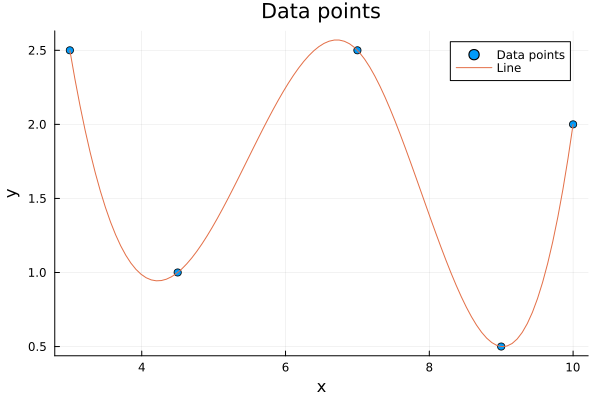

In [53]:
scatter(x_points, y_points, label="Data points", xlabel="x", ylabel="y", title="Data points")
plot!(x_values, y_values, label="Line")